This code samples a test function $\Psi$ of a particle with metropolis algorithm to calculate its Hamiltonian, and it uses $|\Psi_T(x)|^2$ as probabilities to accept a new x point. The proposed points are given by $x_{old} \pm \mu+r*\sigma$ where r is a random number in $[-2,2]$. This method is useful because allows to sample a $\Psi$ which has two distant peaks, but needs a lot of steps for convergence. Probably it's not the best method because sometimes the energy values, calculated by the code, are lower then the analytic GS: this problems occurs when $\sigma$ is too small (<0.5). 

Monitoring the energy value of different $\Psi$, one can check that a function with $\mu \sim 0.6$ and  $\sigma \sim 0.75$ has an energy close to the analytic GS and so the proposed parameters were in the range of these ones for SA alghoritm. Range for temperature is chosen to have an acceptance ratio for metropolis in $p=[1,0.45]$ and so $T \in [100,0.01]$ are tested, reducing it with $T_f=T_i/10$.

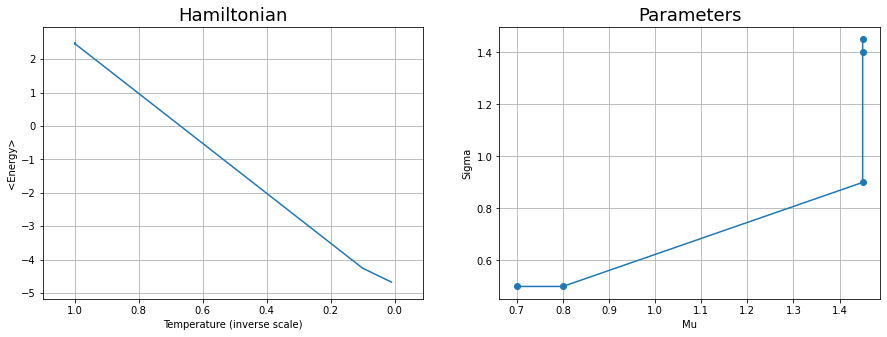

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("Esercizio_1/output.param.0",usecols=(0), delimiter=' ',   unpack='true')
f=np.loadtxt("Esercizio_1/output.param.0",usecols=(3), delimiter=' ', unpack='true')
error = np.loadtxt("Esercizio_1/output.param.0", usecols=(4), delimiter=' ', unpack='true')

x1= np.loadtxt("Esercizio_1/output.param.0",usecols=(1), delimiter=' ',   unpack='true')
f1=np.loadtxt("Esercizio_1/output.param.0",usecols=(2), delimiter=' ', unpack='true')
fig,axs = plt.subplots(1, 2,figsize=(15, 5))

#non consistent
x=np.delete(x,(0,1))
f=np.delete(f,(0,1))
error=np.delete(error,(0,1))

axs[0].errorbar(x,f,yerr=error)
axs[0].set_title('Hamiltonian', fontsize=18)
axs[0].set_xlabel('Temperature (inverse scale)')
axs[0].axis([max(x)+0.1,min(x)-0.1,min(f)-0.5,max(f)+0.5])
axs[0].set_ylabel('<Energy>')
axs[0].grid(True)

axs[1].plot(x1,f1,marker="o")
axs[1].set_title('Parameters', fontsize=18)
axs[1].set_xlabel('Mu')
axs[1].set_ylabel('Sigma')
axs[1].grid(True)

plt.show()

From these two plots, one can observe that with high T the alghoritm accepts all the proposed paramters but with lower T there is convergence to the best ones. This code accept $\mu=0.7$ and $\sigma=0.5$ as best value and the energy of a particle with this $\Psi$ is reported in the next plot. 20 blocks of 15000 steps are used to obtained convergence to this value.

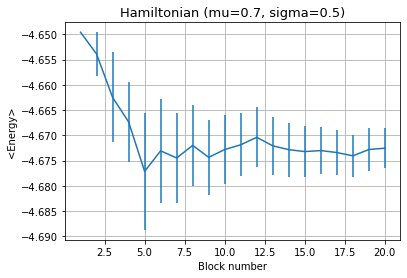

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("Esercizio_1/output.ene.0",usecols=(0), delimiter=' ',   unpack='true')
f=np.loadtxt("Esercizio_1/output.ene.0",usecols=(1), delimiter=' ', unpack='true')
error = np.loadtxt("Esercizio_1/output.ene.0", usecols=(2), delimiter=' ', unpack='true')


plt.errorbar(x,f,yerr=error)
plt.title('Hamiltonian (mu=0.7, sigma=0.5)', fontsize=13)
plt.xlabel('Block number')
plt.ylabel('<Energy>')
plt.grid(True)

plt.show()

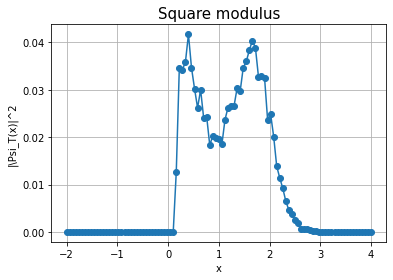

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("Esercizio_1/output.Histo.0",usecols=(0), delimiter=' ',   unpack='true')
f=np.loadtxt("Esercizio_1/output.Histo.0",usecols=(1), delimiter=' ', unpack='true')

plt.plot(x,f,marker="o")
plt.title('Square modulus', fontsize=15)
plt.xlabel("x")
plt.ylabel('|\Psi_T(x)|^2')
plt.grid(True)

plt.show()

This approximation of the GS is not consistent with the analitic because it has a lower energy then the real one, although they are not too distant. It's probably a systematic error in calculating H and in proposing new x, but it has the same problem also in proposing points uniformly distributed in $[\mu-2\sigma,\mu+2\sigma]$. From the square modulus one can check that the obtained $\Psi$ has also a similar shpe to the real one.